# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. 

To do this:

1. generate a random integer between one and three to represent the door hiding the car.
2. Then, generate a second integer between one and three representing the player's selection. 
3. Then, of those the contestant did not choose, select a door concealing a goat to reveal. 
4. Record the results of the simulated game if they changed versus if they did not. 
5. Repeat this process a thousand (or more) times. 
6. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

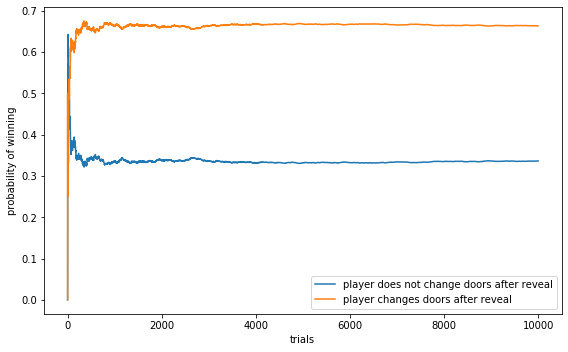

probability of winning (after 10000 trials) if player does NOT change doors after goat reveal is 0.3364
probability of winning (after 10000 trials) if player DOES change doors after goat reveal is 0.6635


In [1]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

doors = {1,2,3}
n_trials = 10000

win_when_not_changing = []
win_when_changing = []

fig = plt.figure(figsize=(8,5))

for trial in range(0, n_trials):
    # generate a random integer between one and three to represent the door hiding the car
    car_door = np.random.randint(0,3)+1

    # generate a second integer between one and three representing the player's selection
    player_door = np.random.randint(0,3)+1

    #of those the contestant did not choose, select a door concealing a goat to reveal.
    goat_door = list(doors.difference({player_door, car_door}))[0]

    remaining_choice = list(doors.difference({player_door, goat_door}))[0]

    win_when_not_changing.append(1 if player_door==car_door else 0)
    win_when_changing.append(1 if remaining_choice == car_door else 0)

T = list(range(0, n_trials))
P_keep = [sum(win_when_not_changing[0:t])/(t+1) for t in T]
P_change = [sum(win_when_changing[0:t])/(t+1) for t in T]

plt.plot(T, P_keep, label="player does not change doors after reveal")
plt.plot(T, P_change, label="player changes doors after reveal")
plt.legend()
plt.ylabel("probability of winning")
plt.xlabel("trials")
fig.tight_layout()
plt.show();

print(f"probability of winning (after {n_trials} trials) if player does NOT change doors after goat reveal is {P_keep[-1]}")
print(f"probability of winning (after {n_trials} trials) if player DOES change doors after goat reveal is {P_change[-1]}")

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 